### Imports

In [1]:
import pandas as pd 
import utils
import chromadb

In [2]:
PATH_TO_FILES = "../data/fbref/cleaned/"
dataframes = utils.get_all_attributes(PATH_TO_FILES)

### Query similar players by one characteristic

In [3]:
df = dataframes["shooting"]

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)
embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-1",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633 # 633 nkunku

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season              2022-2023
League             Bundesliga
Team               RB Leipzig
Player     Christopher Nkunku
Nation                    FRA
Pos                     FW,MF
Age                      24.0
Gls                      16.0
Sh                       70.0
SoT                      25.0
SoT%                     35.7
Sh/90                    3.32
SoT/90                   1.19
G/Sh                     0.19
G/SoT                    0.52
Dist                     15.9
PK                        3.0
PKatt                     4.0
FK                        7.0
xG                       14.4
npxG                     11.3
npxG/Sh                  0.16
G-xG                      1.6
np:G-xG                   1.7
Name: 633, dtype: object

In [4]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=2000
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,16.0,70.0,25.0,...,3.0,4.0,7.0,14.4,11.3,0.16,1.6,1.7,100.000000,0.000000
220,2022-2023,EPL,Brentford,Ivan Toney,ENG,FW,26.0,20.0,87.0,33.0,...,6.0,7.0,9.0,18.7,13.2,0.15,1.3,0.8,99.715310,0.002847
2368,2022-2023,SeriaA,Milan,Olivier Giroud,FRA,FW,35.0,13.0,77.0,29.0,...,3.0,3.0,6.0,12.7,10.4,0.14,0.3,-0.4,99.624801,0.003752
3673,2022-2023,PrimeiraLiga,Boavista,Yusupha Njie,GAM,FW,28.0,13.0,71.0,24.0,...,1.0,3.0,1.0,13.1,10.7,0.16,-0.1,1.3,99.613553,0.003864
1437,2022-2023,LaLiga,Celta Vigo,Iago Aspas,ESP,FW,34.0,12.0,75.0,29.0,...,2.0,3.0,7.0,11.1,8.7,0.12,0.9,1.3,99.583232,0.004168
1312,2022-2023,LaLiga,Mallorca,Vedat Muriqi,KVX,FW,28.0,15.0,71.0,25.0,...,4.0,5.0,0.0,12.5,8.6,0.12,2.5,2.4,99.564135,0.004359
2751,2022-2023,SeriaA,Spezia,M'Bala Nzola,ANG,FW,25.0,13.0,60.0,20.0,...,3.0,3.0,0.0,11.0,8.6,0.14,2.0,1.4,99.545014,0.004550
2456,2022-2023,SeriaA,Juventus,Dušan Vlahović,SRB,FW,22.0,10.0,65.0,20.0,...,2.0,3.0,4.0,9.7,7.3,0.11,0.3,0.7,99.525142,0.004749
1616,2022-2023,LaLiga,Espanyol,Joselu,ESP,FW,32.0,16.0,87.0,33.0,...,5.0,5.0,2.0,14.5,10.5,0.12,1.5,0.5,99.431598,0.005684


In [5]:
merged_data[merged_data["Age"] == 18][:10]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
1859,2022-2023,Ligue1,Lyon,Rayan Cherki,FRA,"MF,FW",18.0,4.0,61.0,21.0,...,0.0,0.0,3.0,4.9,4.9,0.08,-0.9,-0.9,97.803444,0.021966
3159,2022-2023,EreDivisie,Vitesse,Kacper Kozłowski,POL,"MF,FW",18.0,2.0,38.0,17.0,...,0.0,0.0,0.0,3.0,3.0,0.08,-1.0,-1.0,90.272671,0.097273
147,2022-2023,EPL,Brighton,Julio César Enciso,PAR,"FW,MF",18.0,4.0,38.0,18.0,...,0.0,0.0,0.0,4.0,4.0,0.11,0.0,0.0,90.094429,0.099056
3520,2022-2023,PrimeiraLiga,Sporting CP,Youssef Chermiti,POR,FW,18.0,3.0,28.0,12.0,...,0.0,1.0,0.0,5.8,5.1,0.18,-2.8,-2.1,86.679637,0.133204
2395,2022-2023,SeriaA,Atalanta,Giorgio Scalvini,ITA,DF,18.0,2.0,17.0,4.0,...,0.0,0.0,0.0,2.0,2.0,0.12,0.0,0.0,86.240304,0.137597
2984,2022-2023,EreDivisie,AZ Alkmaar,Milos Kerkez,HUN,DF,18.0,3.0,25.0,9.0,...,0.0,0.0,0.0,2.3,2.3,0.09,0.7,0.7,85.246104,0.147539
70,2022-2023,EPL,Manchester Utd,Alejandro Garnacho,ARG,"FW,MF",18.0,3.0,24.0,9.0,...,0.0,0.0,0.0,3.0,3.0,0.13,0.0,0.0,85.026014,0.149740
1087,2022-2023,LaLiga,Barcelona,Alejandro Balde,ESP,DF,18.0,1.0,19.0,4.0,...,0.0,0.0,0.0,1.9,1.9,0.10,-0.9,-0.9,84.792835,0.152072
2462,2022-2023,SeriaA,Juventus,Fabio Miretti,ITA,"MF,FW",18.0,0.0,20.0,5.0,...,0.0,0.0,0.0,2.4,2.4,0.12,-2.4,-2.4,84.553599,0.154464


### Query similar players by two characteristic

In [6]:
df1 = dataframes["shooting"]
df2 = dataframes["possession"]

df = pd.merge(df1, df2, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age'])

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)
embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-2",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633 # 633

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season                      2022-2023
League                     Bundesliga
Team                       RB Leipzig
Player             Christopher Nkunku
Nation                            FRA
Pos                             FW,MF
Age                              24.0
Gls                              16.0
Sh                               70.0
SoT                              25.0
SoT%                             35.7
Sh/90                            3.32
SoT/90                           1.19
G/Sh                             0.19
G/SoT                            0.52
Dist                             15.9
PK                                3.0
PKatt                             4.0
FK                                7.0
xG                               14.4
npxG                             11.3
npxG/Sh                          0.16
G-xG                              1.6
np:G-xG                           1.7
Touches_Touches                 854.0
Touches_Def Pen                  17.0
Touches_Def 

In [7]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=200
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,16.0,70.0,25.0,...,1225.0,43.0,23.0,23.0,45.0,38.0,672.0,176.0,99.999994,5.960464e-08
634,2022-2023,Bundesliga,RB Leipzig,André Silva,POR,FW,26.0,4.0,60.0,22.0,...,984.0,35.0,21.0,23.0,65.0,43.0,556.0,142.0,99.968827,3.117323e-04
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,9.0,46.0,20.0,...,908.0,38.0,18.0,17.0,28.0,24.0,506.0,99.0,99.964392,3.560781e-04
2633,2022-2023,SeriaA,Sassuolo,Domenico Berardi,ITA,FW,27.0,12.0,75.0,19.0,...,1586.0,57.0,29.0,31.0,60.0,23.0,905.0,213.0,99.954051,4.594922e-04
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,6.0,76.0,19.0,...,1053.0,40.0,36.0,17.0,71.0,35.0,561.0,122.0,99.945927,5.407333e-04
186,2022-2023,EPL,Tottenham,Harry Kane,ENG,FW,29.0,30.0,124.0,54.0,...,1842.0,60.0,50.0,21.0,74.0,58.0,1031.0,193.0,99.938256,6.174445e-04
34,2022-2023,EPL,Arsenal,Gabriel Jesus,BRA,FW,25.0,11.0,76.0,31.0,...,1517.0,44.0,31.0,28.0,88.0,65.0,799.0,194.0,99.936563,6.343722e-04
3857,2022-2023,PrimeiraLiga,Portimonense,Welinton Júnior,BRA,FW,29.0,6.0,93.0,28.0,...,1022.0,40.0,30.0,13.0,93.0,40.0,558.0,153.0,99.933136,6.686449e-04
491,2022-2023,EPL,Leicester City,Kelechi Iheanacho,NGA,"FW,MF",25.0,5.0,38.0,13.0,...,724.0,33.0,13.0,18.0,41.0,36.0,380.0,99.0,99.931538,6.846189e-04


In [8]:
shooting = dataframes["shooting"]
possession = dataframes["possession"]
g_s_creation = dataframes["goal_and_shot_creation"]

s_p_merge = pd.merge(shooting, possession, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age'])
df = pd.merge(s_p_merge, g_s_creation, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age'])

len(df.columns), len(shooting.columns), len(possession.columns), len(g_s_creation.columns)

(62, 24, 29, 23)

### Query similar players by three characteristic

In [9]:
from sklearn.preprocessing import RobustScaler, StandardScaler
shooting = dataframes["shooting"]
possession = dataframes["possession"]
g_s_creation = dataframes["goal_and_shot_creation"]

s_p_merge = pd.merge(shooting, possession, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age'])
df = pd.merge(s_p_merge, g_s_creation, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age'])

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)

embeddings = attributes.values.tolist()

#scaler = StandardScaler()
#scaled_data  = scaler.fit_transform(attributes)
#attributes = pd.DataFrame(scaled_data, columns=attributes.columns)
#embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-3",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season                         2022-2023
League                        Bundesliga
Team                          RB Leipzig
Player                Christopher Nkunku
Nation                               FRA
                             ...        
GCA Types_PassDead                   0.0
GCA Types_TO                         3.0
GCA Types_Sh                         1.0
GCA Types_Fld                        3.0
GCA Types_Def                        0.0
Name: 633, Length: 62, dtype: object

In [10]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=200
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_TO,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,16.0,70.0,25.0,...,14.0,0.66,7.0,0.0,3.0,1.0,3.0,0.0,100.000000,0.000000
634,2022-2023,Bundesliga,RB Leipzig,André Silva,POR,FW,26.0,4.0,60.0,22.0,...,10.0,0.52,7.0,0.0,0.0,3.0,0.0,0.0,99.966329,0.000337
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,9.0,46.0,20.0,...,5.0,0.31,2.0,0.0,1.0,1.0,1.0,0.0,99.960178,0.000398
2633,2022-2023,SeriaA,Sassuolo,Domenico Berardi,ITA,FW,27.0,12.0,75.0,19.0,...,17.0,0.82,10.0,1.0,1.0,3.0,2.0,0.0,99.951923,0.000481
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,6.0,76.0,19.0,...,7.0,0.26,5.0,0.0,1.0,1.0,0.0,0.0,99.941748,0.000583
186,2022-2023,EPL,Tottenham,Harry Kane,ENG,FW,29.0,30.0,124.0,54.0,...,18.0,0.48,10.0,0.0,2.0,3.0,3.0,0.0,99.937254,0.000627
34,2022-2023,EPL,Arsenal,Gabriel Jesus,BRA,FW,25.0,11.0,76.0,31.0,...,12.0,0.52,8.0,0.0,1.0,1.0,2.0,0.0,99.930340,0.000697
491,2022-2023,EPL,Leicester City,Kelechi Iheanacho,NGA,"FW,MF",25.0,5.0,38.0,13.0,...,6.0,0.48,6.0,0.0,0.0,0.0,0.0,0.0,99.929672,0.000703
3857,2022-2023,PrimeiraLiga,Portimonense,Welinton Júnior,BRA,FW,29.0,6.0,93.0,28.0,...,4.0,0.17,2.0,0.0,0.0,1.0,1.0,0.0,99.923468,0.000765


### Top 10 most similar players to Nkunku that are under 23 

In [11]:
merged_data[merged_data["Age"] < 23][:10]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_TO,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,9.0,46.0,20.0,...,5.0,0.31,2.0,0.0,1.0,1.0,1.0,0.0,99.960178,0.000398
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,6.0,76.0,19.0,...,7.0,0.26,5.0,0.0,1.0,1.0,0.0,0.0,99.941748,0.000583
1099,2022-2023,LaLiga,Barcelona,Ferrán Torres,ESP,"FW,MF",22.0,4.0,37.0,11.0,...,3.0,0.19,3.0,0.0,0.0,0.0,0.0,0.0,99.895948,0.001041
508,2022-2023,EPL,Leeds United,Brenden Aaronson,USA,"MF,FW",21.0,1.0,41.0,9.0,...,7.0,0.27,3.0,1.0,0.0,1.0,1.0,1.0,99.884737,0.001153
12,2022-2023,EPL,Manchester City,Phil Foden,ENG,FW,22.0,11.0,46.0,22.0,...,14.0,0.68,10.0,0.0,3.0,0.0,1.0,0.0,99.855512,0.001445
219,2022-2023,EPL,Brentford,Bryan Mbeumo,CMR,FW,22.0,9.0,70.0,32.0,...,15.0,0.46,12.0,2.0,1.0,0.0,0.0,0.0,99.854386,0.001456
3116,2022-2023,EreDivisie,Heerenveen,Rami Al Hajj,SWE,"MF,FW",20.0,0.0,20.0,8.0,...,3.0,0.39,2.0,1.0,0.0,0.0,0.0,0.0,99.851942,0.001481
2664,2022-2023,SeriaA,Empoli,Martin Satriano,URU,FW,21.0,2.0,38.0,10.0,...,3.0,0.16,2.0,0.0,0.0,1.0,0.0,0.0,99.838495,0.001615
1198,2022-2023,LaLiga,Villarreal,Yeremi Pino,ESP,"FW,MF",19.0,4.0,50.0,19.0,...,9.0,0.33,7.0,0.0,0.0,2.0,0.0,0.0,99.835342,0.001647


### Dimensionality Reduction: Query by shooting statistics

#### Scale data

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = dataframes["shooting"]

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)

scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

#### Inspect variance by number of components

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

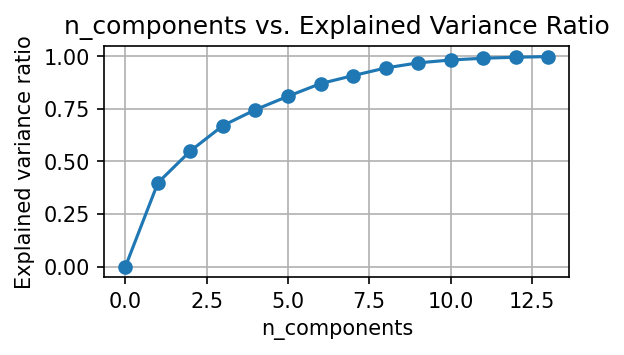

In [13]:
import matplotlib.pyplot as plt
import numpy as np
nums = np.arange(14)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(attributes_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

#### Create Vector Database

In [14]:
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-pca-3",
    metadata={"hnsw:space": "cosine"}
)


#### Construct components and add to VDB

In [20]:
pca = PCA(n_components=6)
embeddings_arr = pca.fit_transform(attributes_scaled)
embeddings = embeddings_arr.tolist()

collection.add(
    embeddings= embeddings,
    ids=ids
)

Add of existing embedding ID: 0
Add of existing embedding ID: 1
Add of existing embedding ID: 2
Add of existing embedding ID: 3
Add of existing embedding ID: 4
Add of existing embedding ID: 5
Add of existing embedding ID: 6
Add of existing embedding ID: 7
Add of existing embedding ID: 8
Add of existing embedding ID: 9
Add of existing embedding ID: 10
Add of existing embedding ID: 11
Add of existing embedding ID: 12
Add of existing embedding ID: 13
Add of existing embedding ID: 14
Add of existing embedding ID: 15
Add of existing embedding ID: 16
Add of existing embedding ID: 17
Add of existing embedding ID: 18
Add of existing embedding ID: 19
Add of existing embedding ID: 20
Add of existing embedding ID: 21
Add of existing embedding ID: 22
Add of existing embedding ID: 23
Add of existing embedding ID: 24
Add of existing embedding ID: 25
Add of existing embedding ID: 26
Add of existing embedding ID: 27
Add of existing embedding ID: 28
Add of existing embedding ID: 29
Add of existing embe

#### Showcase query player

In [21]:
target_id = 633

target = embeddings_arr[target_id,:]
target_embedding = target.tolist()

display(df.iloc[target_id])

Season              2022-2023
League             Bundesliga
Team               RB Leipzig
Player     Christopher Nkunku
Nation                    FRA
Pos                     FW,MF
Age                      24.0
Gls                      16.0
Sh                       70.0
SoT                      25.0
SoT%                     35.7
Sh/90                    3.32
SoT/90                   1.19
G/Sh                     0.19
G/SoT                    0.52
Dist                     15.9
PK                        3.0
PKatt                     4.0
FK                        7.0
xG                       14.4
npxG                     11.3
npxG/Sh                  0.16
G-xG                      1.6
np:G-xG                   1.7
Name: 633, dtype: object

#### Query and inspect results

In [22]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=1000
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,16.0,70.0,25.0,...,3.0,4.0,7.0,14.4,11.3,0.16,1.6,1.7,99.999982,1.788139e-07
2456,2022-2023,SeriaA,Juventus,Dušan Vlahović,SRB,FW,22.0,10.0,65.0,20.0,...,2.0,3.0,4.0,9.7,7.3,0.11,0.3,0.7,99.416625,5.833745e-03
1738,2022-2023,Ligue1,Marseille,Alexis Sánchez,CHI,"FW,MF",33.0,14.0,63.0,29.0,...,2.0,3.0,5.0,12.6,10.2,0.17,1.4,1.8,99.106616,8.933842e-03
1437,2022-2023,LaLiga,Celta Vigo,Iago Aspas,ESP,FW,34.0,12.0,75.0,29.0,...,2.0,3.0,7.0,11.1,8.7,0.12,0.9,1.3,98.539257,1.460743e-02
2368,2022-2023,SeriaA,Milan,Olivier Giroud,FRA,FW,35.0,13.0,77.0,29.0,...,3.0,3.0,6.0,12.7,10.4,0.14,0.3,-0.4,97.784668,2.215332e-02
2751,2022-2023,SeriaA,Spezia,M'Bala Nzola,ANG,FW,25.0,13.0,60.0,20.0,...,3.0,3.0,0.0,11.0,8.6,0.14,2.0,1.4,97.457200,2.542800e-02
220,2022-2023,EPL,Brentford,Ivan Toney,ENG,FW,26.0,20.0,87.0,33.0,...,6.0,7.0,9.0,18.7,13.2,0.15,1.3,0.8,97.305858,2.694142e-02
2095,2022-2023,Ligue1,Strasbourg,Habib Diallo,SEN,FW,27.0,20.0,90.0,36.0,...,3.0,4.0,1.0,17.8,14.5,0.17,2.2,2.5,97.252679,2.747321e-02
2225,2022-2023,Ligue1,Troyes,Mama Samba Baldé,GNB,FW,26.0,12.0,73.0,24.0,...,2.0,2.0,0.0,10.6,9.1,0.12,1.4,0.9,96.983910,3.016090e-02


In [23]:
merged_data[merged_data["Age"] == 18][:10]

,Season,League,Team,Player,Nation,Pos,Age,Gls,Sh,SoT,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
2984,2022-2023,EreDivisie,AZ Alkmaar,Milos Kerkez,HUN,DF,18.0,3.0,25.0,9.0,...,0.0,0.0,0.0,2.3,2.3,0.09,0.7,0.7,43.858004,0.561420
70,2022-2023,EPL,Manchester Utd,Alejandro Garnacho,ARG,"FW,MF",18.0,3.0,24.0,9.0,...,0.0,0.0,0.0,3.0,3.0,0.13,0.0,0.0,39.251602,0.607484
2103,2022-2023,Ligue1,Strasbourg,Mouhamadou Diarra,FRA,"MF,FW",18.0,3.0,23.0,9.0,...,0.0,0.0,0.0,1.8,1.8,0.08,1.2,1.2,36.384910,0.636151
3159,2022-2023,EreDivisie,Vitesse,Kacper Kozłowski,POL,"MF,FW",18.0,2.0,38.0,17.0,...,0.0,0.0,0.0,3.0,3.0,0.08,-1.0,-1.0,35.227740,0.647723
518,2022-2023,EPL,Leeds United,Degnand Gnonto,ITA,"FW,MF",18.0,2.0,22.0,8.0,...,0.0,0.0,0.0,1.8,1.8,0.08,0.2,0.2,28.140062,0.718599
3419,2022-2023,PrimeiraLiga,Benfica,António Silva,POR,DF,18.0,3.0,18.0,7.0,...,0.0,0.0,0.0,4.1,3.9,0.22,-1.1,-0.9,21.114957,0.788850
3167,2022-2023,EreDivisie,Vitesse,Mohamed Sankoh,NED,FW,18.0,2.0,20.0,7.0,...,0.0,0.0,0.0,4.1,4.1,0.20,-2.1,-2.1,9.696889,0.903031
2395,2022-2023,SeriaA,Atalanta,Giorgio Scalvini,ITA,DF,18.0,2.0,17.0,4.0,...,0.0,0.0,0.0,2.0,2.0,0.12,0.0,0.0,2.547348,0.974527
2995,2022-2023,EreDivisie,AZ Alkmaar,Maxim Dekker,NED,DF,18.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.3,0.3,0.13,0.7,0.7,-0.813019,1.008130


#### Conclusion

- It is possible to reduce the dimension and maintain relevant results (`n_components = 5`)
- It also presents some unanticipated players
- The percentage of similarity has is now more differentiated